# 1. Prepare the data



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the training dataset
df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
df_full = pd.read_csv("/datasets/gold_recovery_full.csv")
display(df_train,df_test,df_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


# Check
Check that the quantity removed has been calculated correctly. Using the training set, calculate the quantity removed for the feature rougher.output.recovery. Find the EAM between your calculations and the feature values. Provide results.

In [6]:
def ret (df,c,f,t):
    retirada = ((df[c]*df[f]-df[c]*df[t])/(df[f]*df[c]-df[f]*df[t]))*100
    return retirada
display(df_train[['rougher.output.recovery']])
reti = ret(df_train.dropna(subset=['rougher.output.recovery']),'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
reti

,rougher.output.recovery
0,87.107763
1,86.843261
2,86.842308
3,87.226430
4,86.688794
...,...
16855,89.574376
16856,87.724007
16857,88.890579
16858,89.858126


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [7]:
The difference between the values is practically negligible, the new column has been generated in the best way.

1.1067401243687207e-14

# Characteristics not available
Analyze the characteristics not available in the test set. What are these parameters? What type are they?

In [8]:
display(df_train.shape, df_test.shape, df_full.shape)

16860+5856

(16860, 87)

(5856, 53)

(22716, 87)

22716

In [9]:
l_cols = []

for col in df_train.columns:
    if col not in df_test.columns:
        l_cols.append(col)
l_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [10]:
l_cols_in = []

for col in df_train.columns:
    if col in df_test.columns:
        l_cols_in.append(col)
l_cols_in

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

There are non-existent columns in the test data frame that exist in train and full. The first list is about the columns that are not in the df_test and the second is about those that are. We can see that there are many outputs missing from the df_test that are in the df_train.

# Pre-processing

We will remove those columns from the training data set that differ from the test set. That said, there are two variables that are not included in the test dataset that should be, namely the variables "final.output.recovery" and "rougher.output.recovery", which are the targets of our investigation. We will merge these variables from DataFrame full into DataFrame test under "date" so that we have our targets when testing our models.

In [11]:
test = pd.merge(df_test, df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')


train = df_train.drop(columns=[x for x in df_train if x not in test], axis=1)

test = test.drop(columns=[x for x in test if x not in df_train], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   final.output.recovery                       15339 non-null  float64
 2   primary_cleaner.input.sulfate               15553 non-null  float64
 3   primary_cleaner.input.depressant            15598 non-null  float64
 4   primary_cleaner.input.feed_size             16860 non-null  float64
 5   primary_cleaner.input.xanthate              15875 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 10  primary_cl

In [13]:
print(f"Duplicates in the dataframe train: {train.duplicated().sum()}")
print(f"Duplicates in the dataframe test: {test.duplicated().sum()}")

Duplicates in the dataframe train: 0
Duplicates in the dataframe test: 0


In [14]:
print(f"NaNs in train: {train.isnull().any(axis=1).sum()}")
print(f"NaNs in test: {test.isna().any(axis=1).sum()}")

NaNs in train: 4181
NaNs in test: 627


As there are many NaNs in the DataFrames, we can't simply discard them. Therefore, we will fill in the NaNs using the k-Nearest Neighbor method. This method imputes missing values in datasets by finding the nearest neighbors using a Euclidean distance matrix. We believe that this method would provide us with the most accurate estimate of a NaNs value considering the dataframe we are working on.

In [15]:
scaler = MinMaxScaler()


scale_columns = [x for x in train.columns if x  not in ['date', 'rougher.output.recovery', 'final.output.recovery']]
non_scale_columns = ['date', 'rougher.output.recovery', 'final.output.recovery']


train_scaled = pd.DataFrame(scaler.fit_transform(train[scale_columns].copy()), columns = scale_columns)
test_scaled = pd.DataFrame(scaler.transform(test[scale_columns].copy()), columns = scale_columns)

In [16]:
imputer = KNNImputer()


train_scaled = pd.concat([train[non_scale_columns]] + \
                              [pd.DataFrame(imputer.fit_transform(train_scaled), \
                               columns=train_scaled.columns)], axis = 1)

test_scaled = pd.concat([test[non_scale_columns]] + \
                             [pd.DataFrame(imputer.transform(test_scaled), \
                              columns=test_scaled.columns)], axis = 1)

In [17]:
print(f"NaNs in train_scaled: {train_scaled.isnull().any(axis=1).sum()}")
print(f"Percentage of NaNs in one or more targets in train_scaled: {round(100 * (train_scaled.isnull().any(axis=1).sum()) / len(train_scaled), 2)}\n")
print(f"NaNs in test_scaled: {test_scaled.isna().any(axis=1).sum()}")
print(f"Percentage of NaNs in one or more targets in test_scaled: {round(100 * (test_scaled.isnull().any(axis=1).sum()) / len(test_scaled), 2)}")

NaNs in train_scaled: 2711
Percentage of NaNs in one or more targets in train_scaled: 16.08

NaNs in test_scaled: 566
Percentage of NaNs in one or more targets in test_scaled: 9.67


In [18]:
train_scaled = train_scaled.dropna().reset_index(drop=True)
test_scaled = test_scaled.dropna().reset_index(drop=True)
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   rougher.output.recovery                     14149 non-null  float64
 2   final.output.recovery                       14149 non-null  float64
 3   primary_cleaner.input.sulfate               14149 non-null  float64
 4   primary_cleaner.input.depressant            14149 non-null  float64
 5   primary_cleaner.input.feed_size             14149 non-null  float64
 6   primary_cleaner.input.xanthate              14149 non-null  float64
 7   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 8   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 9   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 10  primary_cl

In [19]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   rougher.output.recovery                     5290 non-null   float64
 2   final.output.recovery                       5290 non-null   float64
 3   primary_cleaner.input.sulfate               5290 non-null   float64
 4   primary_cleaner.input.depressant            5290 non-null   float64
 5   primary_cleaner.input.feed_size             5290 non-null   float64
 6   primary_cleaner.input.xanthate              5290 non-null   float64
 7   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 10  primary_clea

# CONCLUSION

We've loaded the libraries, visualized the data. We've done the withdrawal calculation successfully and the EAM was small. We have prepared the data for missing values and different columns as well.

# DataAnalysis

# Note
Note how the concentration of metals (Au, Ag, Pb) changes depending on the stage of purification.

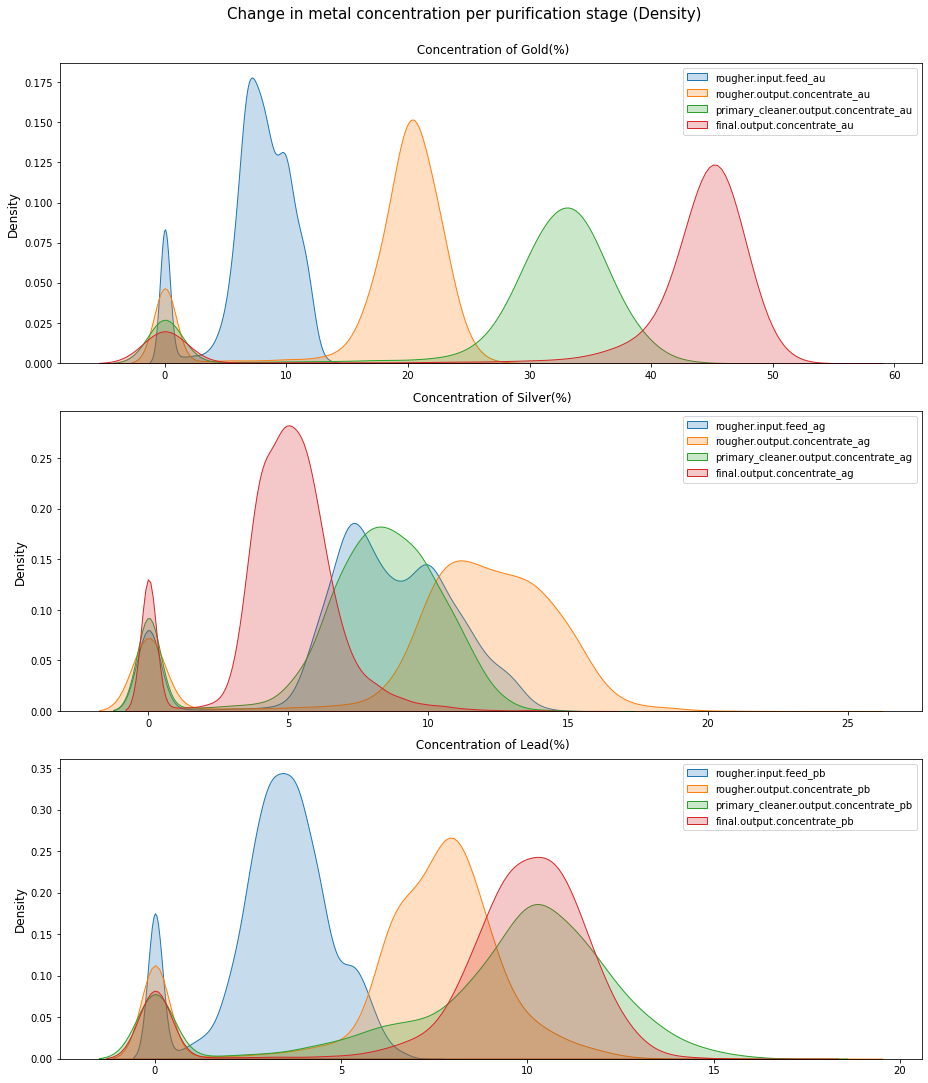

In [20]:
concen = ["rougher.input.feed", "rougher.output.concentrate", "primary_cleaner.output.concentrate", "final.output.concentrate"]

metals = {'_au' : 'Gold', '_ag' : 'Silver', '_pb' : 'Lead'}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 15), sharey=False)
fig.suptitle('Change in metal concentration per purification stage (Density)', fontsize=15, y=1)

for x in metals.keys():
    for c in concen:
        ax = list(metals.keys()).index(x)
        sns.kdeplot(df_full[(c+x)], ax=axes[ax], shade='fill', label=(c+x))
        axes[ax].legend()
        axes[ax].set_xlabel(' Concentration of '+metals[x]+'(%)', fontsize=12, labelpad = 10)
        axes[ax].xaxis.set_label_position('top')
        axes[ax].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()


Gold: At each stage of the purification process, the concentration of gold increases. This is exactly what you want to see in a gold extraction project.

Silver: Interestingly, after flotation, the concentration of silver increases, but then decreases after each process. The end result is a lower concentration of silver than the concentration in the initial ore mix.

Lead: It seems that the concentration of lead increases until the second phase cleaning process, where it remains approximately the same as the concentration after the primary cleaning process.

There appear to be outliers in the relevant data. For each stage of the process, we see that there are places where the concentration of each metal is 0. This could be due to a lack of the metal in the initial ore, or a problem with the data.

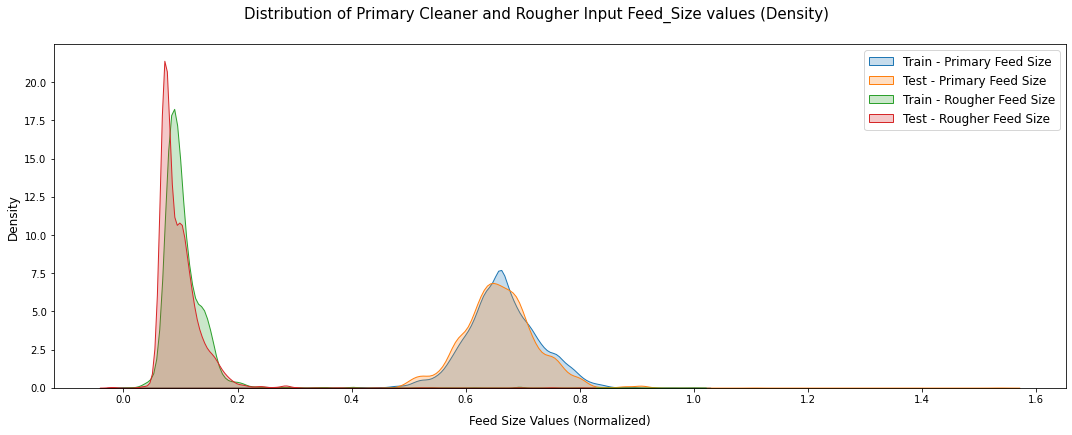

In [21]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Distribution of Primary Cleaner and Rougher Input Feed_Size values (Density)', fontsize=15, y=1)

sns.kdeplot(train_scaled['primary_cleaner.input.feed_size'], fill=True, label='Train - Primary Feed Size')
sns.kdeplot(test_scaled['primary_cleaner.input.feed_size'], fill=True, label='Test - Primary Feed Size')
sns.kdeplot(train_scaled['rougher.input.feed_size'], fill=True, label='Train - Rougher Feed Size')
sns.kdeplot(test_scaled['rougher.input.feed_size'], fill=True, label='Test - Rougher Feed Size')
plt.legend(fontsize=12)
plt.xlabel('Feed Size Values (Normalized)', fontsize=12, labelpad = 10)
plt.ylabel('Density', fontsize=12)
    
plt.tight_layout()
plt.show()

As we can see from the graph above, the distributions of values for 'primary_cleaner.input.feed_size' and 'rougher.input.feed_size' are practically the same for the training and test datasets. This is a good thing, as very different distributions of the main features between the training and test datasets can negatively affect a model's performance.

It is important to note here that the feed sizes shown in the graph are not the actual values from the original datasets; instead, they are the scaled values we obtained after normalizing the data.

In [22]:
def metal_concen_sum(df, stage):
    metal_handles = list(metals.keys())
    total_concen = df[stage+metal_handles[0]] + df[stage+metal_handles[1]] + df[stage+metal_handles[2]]
    return total_concen

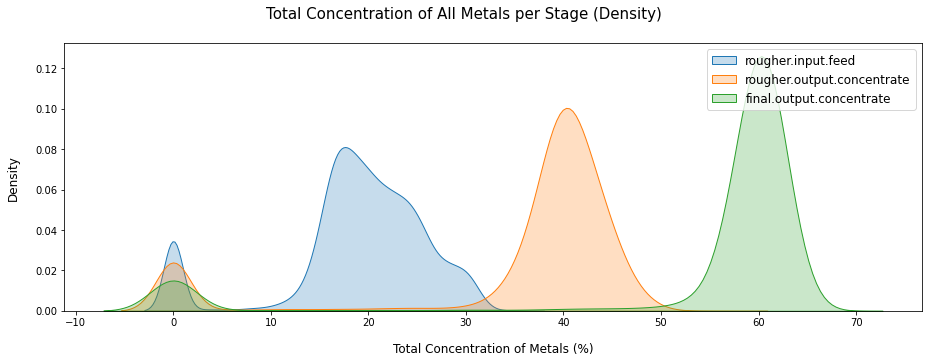

In [23]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals per Stage (Density)', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(df_full, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(df_full, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(df_full, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Concentration of Metals (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

The graph above shows the density estimate for the distribution of total metal concentrations for each stage of the purification process. As we can see, the total concentration of all metals mostly increases at each stage of the purification process. However, there are clear outliers, which are represented by the values clustered around 0. To ensure that these outliers do not negatively affect the models we will train in a later section, we will remove the outliers from our training and test datasets. Based on the graph, we believe that a good cut-off concentration value is 10 for each stage. Since the values in the training and test datasets have been normalized, we can't simply filter the datasets by adding up the relevant values and selecting only the rows where the value is greater than 10. Instead, we filter out these outliers from the full DataFrame and then remove these rows from the other datasets using the 'date' indexer.

In [24]:
full_no_outliers = df_full.loc[(df_full[['rougher.input.feed_au', 'rougher.input.feed_pb', \
                                               'rougher.input.feed_ag']].sum(axis=1) > 10) \
                                  & (df_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', \
                                                 'rougher.output.concentrate_ag']].sum(axis=1) > 10) \
                                  & (df_full[['final.output.concentrate_au', 'final.output.concentrate_pb', \
                                                'final.output.concentrate_ag']].sum(axis=1) > 10)]

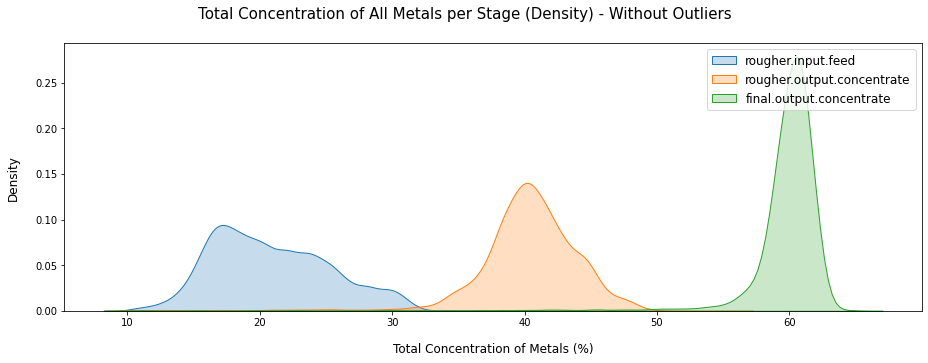

In [25]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals per Stage (Density) - Without Outliers', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(full_no_outliers, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(full_no_outliers, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(full_no_outliers, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Concentration of Metals (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

As you can see from the graph above, we have successfully removed the outliers. We have stored the filtered DataFrame full in the variable full_no_outliers. Now, let's make sure that only the rows listed in this filtered DataFrame are present in the training and test datasets. To do this, we will remove any rows from the training and test datasets where the value 'date' is not present in full_no_outliers.


# Remove Outliers

In [28]:
total_before = [len(train_scaled), len(test_scaled)]


train_scaled = train_scaled.loc[train_scaled['date'].isin(full_no_outliers['date'])].reset_index(drop=True)
test_scaled = test_scaled.loc[test_scaled['date'].isin(full_no_outliers['date'])].reset_index(drop=True)


display(pd.DataFrame([[total_before[0], len(train_scaled), round((100 - (len(train_scaled) / total_before[0]) * 100), 2)], \
                      [total_before[1], len(test_scaled), round((100 - (len(test_scaled) / total_before[1]) * 100), 2)]], \
                    columns = ['Initial', 'New', 'Difference (%)'], index=['Train', 'Test']))

,Initial,New,Difference (%)
Train,13650,13650,0.0
Test,5133,5133,0.0


In [ ]:
# define variable for clean dataframe
df_test_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].isnull()]
df_test_final = df_test_final.drop(columns = ['rougher.output.recovery', 'final.output.recovery'])

df_train_final = df_full_fixed[df_full_fixed['rougher.output.recovery'].notnull()].reset_index(drop = True)

The overall aim of this analysis was to determine whether there were any outliers that could have a negative impact on our subsequent models; in addition, we wanted to determine whether the distribution of rougher.feed_size values was similar for the training and test datasets, since very different distributions could also negatively affect our models.

Based on our analysis, we found that the distributions of the rougher.feed_size values are similar for the training and test datasets. We also found that there are outliers regarding the concentration of metals at different stages of the purification process. Most notably, we found that when adding up the concentration of all the metals in the main stages of the purification process, there are many values that appear to be 0, or approximately 0. Based on our graph, we can see that these are clearly outliers.

To remove the outliers from the training and test datasets, we filter out the outliers from the full DataFrame and save the results in a new variable. We then used the .isin() function to ensure that only the data points listed in the anomaly-free dataset are present in the training and test datasets. We were able to use this method because the data points are indexed by 'data' values; as such, we were able to check that the 'data' values in the training and test data sets are in the data set without outliers and eliminate the data points that don't meet this condition.



# Build Model

In [29]:
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

def f_smape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape


In [30]:
targets = ['rougher.output.recovery', 'final.output.recovery']
features = [x for x in train_scaled if x not in targets and x != 'date']

y_train, y_test = train_scaled[targets].values, test_scaled[targets].values
X_train, X_test = train_scaled[features].values, test_scaled[features].values


# sMAPE function

Write a function to calculate the final sMAPE value.

In [31]:
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

def f_smape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape

# Model training
Train different models. Evaluate them using cross-validation. Choose the best model and test it using the test sample. Provide results.

In [32]:
smape = make_scorer(f_smape, greater_is_better=False)

def train_fit_score(model, params, name):
    model = GridSearchCV(model, param_grid=params, cv=5, scoring=smape, verbose=0, refit=True)
    model.fit(X_train, y_train)
    return pd.DataFrame([[name, abs(model.best_score_), model.best_params_]], columns=['Estimator', 'Best Score', 'Best Params'])


In [46]:
DecisionTree = train_fit_score(DecisionTreeRegressor(random_state=12345), \
                      {'max_depth': range(5, 10, 5), \
                       'min_impurity_decrease' : np.arange(.01, .20, .02), \
                       'min_samples_split' : range(1, 10, 2)}, 'Decision Tree')

In [33]:
LinearRegressor = train_fit_score(LinearRegression(), {}, 'Linear Regressor')

In [34]:
LassoRegressor = train_fit_score(Lasso(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)}, 'Lasso Regressor')

In [35]:
KNNeighbors = train_fit_score(KNeighborsRegressor(), 
                        {'n_neighbors' : range(2, 10, 1),
                         'weights' : ['uniform', 'distance']}, 'KNeighbors Regressor')

In [47]:
scores = pd.concat([DecisionTree, LinearRegressor, LassoRegressor, KNNeighbors]).set_index('Estimator')
scores['Best Score'] = scores['Best Score'].round(2)
display(scores.drop('Best Params', axis=1))

,Best Score
Estimator,
Decision Tree,9.18
Linear Regressor,10.01
Lasso Regressor,8.51
KNeighbors Regressor,9.74


We trained five different regression models and obtained the sMAPE scores using the predictions from each model. In doing so, we used GridSearchCV to iterate through a series of hyperparameters for each model; we also specified that GridSearchCV use the sMAPE function we created for the score and return the score of the model with the lowest average sMAPE score. Based on our results, it seems that the Lasso regressor performs best, with an average symmetrical mean absolute percentage error of approximately 8.51. In the following subsection, we will try to confirm these results using sklearn's "cross_val_score" function.

In [48]:
regressors = [DecisionTreeRegressor(**scores['Best Params'][0]), LinearRegression(**scores['Best Params'][1]), \
              Lasso(**scores['Best Params'][2]), KNeighborsRegressor(**scores['Best Params'][3])]
              

cv_scores = []

for regressor in regressors:
    temp_score = abs(cross_val_score(regressor, X_train, y_train, cv=5, scoring=smape, verbose=0))
    cv_scores.append(round(np.mean(temp_score), 2))


In [49]:
display(pd.DataFrame(cv_scores, columns=['Cross Val. Scores'], index=scores.index))

,Cross Val. Scores
Estimator,
Decision Tree,9.18
Linear Regressor,10.01
Lasso Regressor,8.51
KNeighbors Regressor,9.74


As we can see, the results we obtained using cross-validation are the same as the scores we received from the models we trained. To obtain these scores, we used sklearn's cross_val_score function and ran the cross-validation 5 times on all the estimators used previously; in doing so, we passed to each estimator the parameters that we thought provided the best sMAPE score. The fact that we obtained the same sMAPE scores as before was expected.


# sMAPE

In [50]:
best_model = Lasso(**scores['Best Params'][2]).fit(X_train, y_train)

Lasso_smape = round(f_smape(y_test, best_model.predict(X_test)), 2)

print(f'sMAPE score for the best Lasso Regressor using the dataset test: {Lasso_smape}')

sMAPE score for the best Lasso Regressor using the dataset test: 6.28


sMAPE score for the best Lasso Regressor using the dataset test: 6.28
We used the Lasso regressor with the optimal parameters we identified to calculate the model's sMAPE score using the test datasets. As you can see, the sMAPE score for the test datasets is better than the score for the training datasets. Our score of around 6.28 tells us that the model's prediction is wrong by an average of around 6%. Although this sounds good, we can't determine whether the value is really good without comparing it with the sMAPE score of a naive prediction model.

In [51]:
smape_sanity = f_smape(y_test, np.tile(np.mean(y_train, axis=0), (len(y_test), 1)))
print(f'sMAPE score for the sanity check model: {round(smape_sanity, 2)}')


sMAPE score for the sanity check model: 7.54


We "train" our sanity "model" using the training data set; in doing so, we change the target values to the average value of each target. As you can see, the score of the sanity "model" is slightly higher than the score of our best model. Although the difference is not huge, it shows that our Lasso regressor is a step in the right direction.

# Conclusion

The aim of this project was to prepare a prototype of a model based on extraction and purification data that predicts the amount of pure gold recovered from gold ore. In carrying out this task, we first pre-processed the data; this involved checking for duplicates, scaling the data, filling in the NaNS and adding targets to the test data set. We then analyzed the data, examining the concentration of metals at various stages, visualizing the total concentration of all metals after the main processes, determining whether the distribution in the training and test datasets is similar and removing outliers. We then created functions to calculate the final sMAPE score from predictions and targets, and trained several regression models. We selected the model that provided the lowest sMAPE score and obtained the score for the test datasets using the optimal parameters identified. Finally, we compared the score with the score provided by a sanity "model".

Although the sMAPE score of our best model was very good, approximately 6.28%, we needed to test this model against a sanity "model" to get an accurate idea of our model's performance. As you can see, the sMAPE score of our sanity "models" was 7.54%, which is more than 1% higher than our score using the test dataset. However, this score is also lower than that obtained on the training dataset. Perhaps the reason we had a lower sMAPE on the test dataset has to do with the way the samples were chosen for each set.

Although our model was not able to provide an sMAPE score much lower than the sanity "model" score, we understand that it is in Zyfra's interest to adjust its process in order to obtain the maximum amount of gold from the ore. We therefore recommend that those who prepare the data and understand the gold extraction process carefully examine the features in the full data set and organize them by importance (perhaps by correlation with targets). Selecting only those with the highest importance, we recommend collecting more data and using it to train and test the regression models again. Perhaps, with weighted features, it will be possible to obtain a model that gives a much lower sMAPE score than the sanity "model".